## **Association Analysis -  Sequential Pattern Mining (SPM)**

### 1. Introduction and algorithm description
- This notebook uses the real time itemset dataset to demonstrate the association rule mining algorithms below which are provided by the hana_ml.<br>
<br>
- **SPM(Sequential Pattern Mining)**
 The sequential pattern mining algorithm searches for frequent patterns in sequence databases. A sequence database consists of ordered elements or events. For example, a customer first buys bread, then eggs and cheese, and then milk. This forms a sequence consisting of three ordered events. We consider an event or a subsequent event is frequent if its support, which is the number of sequences that contain this event or subsequence, is greater than a certain value. This algorithm finds patterns in input sequences satisfying user defined minimum support.

**Understand Sequence Pattern Mining before going into practice**<br>

- T1: Find all subsets of items that occur with a specific sequence in all other transactions:
      e.g {Playing cricket -> high ECG -> Sweating}
- T2: Find all rules that correlate the order of one set of items after that another set of items in the transaction database:
      e.g  72% of users who perform a web search then make a long eye gaze
           over the ads follow that by a successful add-click 
**Prerequisites**<br>
● The input data does not contain null value.<br> 
● There are no duplicated items in each transaction<br>

### **Setup Connection**

In [6]:
url, port, user, pwd = Settings.load_config("../config/e2edata.ini")
# the connection
#print(url , port , user , pwd)
connection_context = dataframe.ConnectionContext(url, port, user, pwd)
print(connection_context.connection.isconnected())

True


### **Load Data for SPM**
<br>

Check if the table already exist in your schema 
Select * from PAL_SPM_DATA_TBL <br>
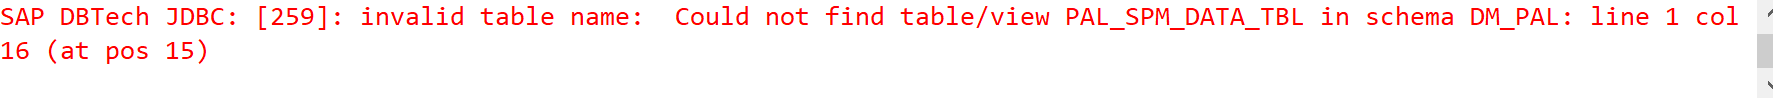


## Dataset
we will analyze the store data for frequent pattern mining ,this is the sample data which is available on SAP's help webpage.

- **Attribute Information**<br>
 CUSTID -  Customer ID <br>
 TRANSID - Transaction ID <BR>
 ITEMS - Item of Transaction

### **Import Packages**
First, import packages needed in the data loading.

In [3]:
from hana_ml import dataframe
from data_load_utils import DataSets, Settings

## **Setup Connection**
In our case, the data is loaded into a table called "PAL_APRIORI_TRANS_TBL" in HANA from a csv file "apriori_item_data.csv". To do that, a connection to HANA is created and then passed to the data loader. To create a such connection, a config file, config/e2edata.ini is used to control the connection parameters. A sample section in the config file is shown below which includes HANA url, port, user and password information.<br>
<br>
###################<br>
[hana]<br>
url=host-url<br>
user=username<br>
passwd=userpassword<br>
port=3xx15<br>
<br>
###################<br>

In [4]:
url, port, user, pwd = Settings.load_config("../config/e2edata.ini")
# the connection
#print(url , port , user , pwd)
connection_context = dataframe.ConnectionContext(url, port, user, pwd)
print(connection_context.connection.isconnected())

True


  **Load Data**<br>
   Then, the function DataSets.load_spm_data() is used to decide load or reload the data from scratch. If it is the first time to    load data, an exmaple of return message is shown below:
   
   ERROR:hana_ml.dataframe:Failed to get row count for the current Dataframe, (259, 'invalid table name:  Could not find table/view<BR> 
PAL_SPM_DATA_TBL in schema DM_PAL: line 1 col 37 (at pos 36)')<br>
Table PAL_SPM_DATA_TBL doesn't exist in schema DM_PAL<br>
Creating table PAL_SPM_DATA_TBL in schema DM_PAL ....<br>
Drop unsuccessful<br>
Creating table DM_PAL.PAL_SPM_DATA_TBL<br>
Data Loaded:100%<br>
   
   #####################<br>
   

In [7]:
data_tbl = DataSets.load_spm_data(connection_context)

ERROR:hana_ml.dataframe:Failed to get row count for the current Dataframe, (259, 'invalid table name:  Could not find table/view PAL_SPM_DATA_TBL in schema DM_PAL: line 1 col 37 (at pos 36)')


Table PAL_SPM_DATA_TBL doesn't exist in schema DM_PAL
Creating table PAL_SPM_DATA_TBL in schema DM_PAL ....
Drop unsuccessful
Creating table DM_PAL.PAL_SPM_DATA_TBL
Data Loaded:100%


**if data is already loaded into HANA**

In [65]:
data_tbl = DataSets.load_spm_data(connection_context)
print("Table Name is: " +str(data_tbl))
import pandas as pd

Table PAL_SPM_DATA_TBL exists and data exists
Table Name is: PAL_SPM_DATA_TBL


#### Create dataframes using Pandas Dataframes for data load from SAP HANA 

In [68]:
##Create a dataframe df from PAL_SPM_TRANS_TBL for the following steps.
df_spm = pd.DataFrame(columns=['CUSTID' , 'TRANSID' , 'ITEMS'])
df_spm = dataframe.create_dataframe_from_pandas(connection_context=connection_context, pandas_df=df_spm, table_name=data_tbl, force=False, replace=True)

In [69]:
data_tbl = DataSets.load_spm_data(connection_context)
print("Table Name is: " +str(data_tbl))

Creating table DM_PAL.PAL_SPM_DATA_TBL
Data Loaded:100%
Table Name is: PAL_SPM_DATA_TBL


In [70]:
df = df_spm

In [80]:
df.collect().head(100) ##Display Data

,CUSTID,TRANSID,ITEMS
0,G,1,Apple
1,F,2,Blueberry
2,F,1,Apple
3,C,2,Mango
4,I,2,Blueberry
5,E,3,Desert
6,I,2,Mango
7,G,3,Desert
8,H,2,Mango
9,D,1,Apple


In [81]:
df.dropna() ##Drop NAN if any of the blank record is present in your dataset

In [82]:
print("Toal Number of Records : " + str(df.count()))

Toal Number of Records : 38


In [83]:
print("Columns:")
df.columns

Columns:


['CUSTID', 'TRANSID', 'ITEMS']

## **Filter**

In [84]:
df.filter("CUSTID = 'A'").head(10).collect()

,CUSTID,TRANSID,ITEMS
0,A,3,Desert
1,A,2,Cherry
2,A,1,Blueberry
3,A,1,Apple
4,A,2,Apple


In [113]:
df.filter('TRANSID = 1').head(100).collect()

,CUSTID,TRANSID,ITEMS
0,G,1,Apple
1,F,1,Apple
2,D,1,Apple
3,C,1,Apple
4,E,1,Apple
5,B,1,Blueberry
6,A,1,Blueberry
7,I,1,Apple
8,A,1,Apple
9,B,1,Cherry


In [108]:
df.filter("ITEMS = 'Apple'").head(10).collect()

,CUSTID,TRANSID,ITEMS
0,G,1,Apple
1,F,1,Apple
2,D,1,Apple
3,C,1,Apple
4,E,1,Apple
5,I,1,Apple
6,A,1,Apple
7,A,2,Apple
8,H,1,Apple
9,B,1,Apple


### **Group by column**

In [86]:
df.agg([('count' , 'ITEMS' , 'TOTAL TRANSACTIONS')] , group_by='ITEMS').head(100).collect()

,ITEMS,TOTAL TRANSACTIONS
0,Desert,9
1,Mango,7
2,Cherry,2
3,Blueberry,10
4,Apple,10


In [87]:
df.agg([('count' , 'CUSTID', 'TOTAL TRANSACTIONS')] , group_by='CUSTID').head(100).collect()

,CUSTID,TOTAL TRANSACTIONS
0,F,4
1,H,4
2,C,4
3,A,5
4,E,4
5,I,4
6,G,4
7,B,5
8,D,4


In [88]:
df.agg([('count' , 'TRANSID', 'TOTAL TRANSACTIONS')] , group_by='TRANSID').head(100).collect()

,TRANSID,TOTAL TRANSACTIONS
0,2,17
1,1,12
2,3,9


**Display the most popular items**

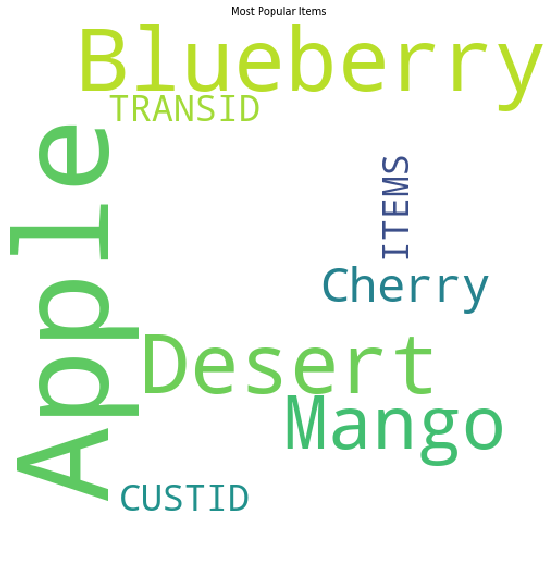

In [103]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 500, max_words = 120).generate(str(df_spm.head(100).collect()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 10)
plt.show()

### Import SPM Method from HANA ML Library 

In [115]:
df.filter("ITEMS = 'Blueberry'").head(100).count()

10

In [104]:
from hana_ml.algorithms.pal.association import SPM

### **Setup SPM instance**

In [105]:
sp = SPM(conn_context=connection_context,
             min_support=0.5,
             relational=False,
             ubiquitous=1.0,
             max_len=10,
             min_len=1,
             calc_lift=True)

In [106]:
sp.fit(data=df_spm, customer='CUSTID', transaction='TRANSID', item='ITEMS')

**Result Analysis**:<br>

- Itemset Apple has support 1.0 indicates the frequencey of the item in all the transactions , most frequent item - confidence & lift is 0 for all the single items which states there is no antecedent & consequent item of them
- Consider (Apple , Blueberry): Support is .88 (Frequeny of these items together is 88%) , Confidence is 88% means if someone is buying Apple then 88% chances they will also have blueberry in theri bucket , lif is .89 close to 1 indicates high Asscoiation of items
- Benefit of having such kind of result is Storekeepers can easily look into purchasing Trends for their Shops


In [107]:
sp.result_.collect()

,PATTERN,SUPPORT,CONFIDENCE,LIFT
0,{Apple},1.000000,0.000000,0.000000
1,"{Apple},{Blueberry}",0.888889,0.888889,0.888889
2,"{Apple},{Blueberry},{Desert}",0.777778,0.875000,0.875000
3,"{Apple},{Blueberry,Mango}",0.777778,0.777778,1.000000
4,"{Apple},{Blueberry,Mango},{Desert}",0.777778,1.000000,1.000000
5,"{Apple},{Mango}",0.777778,0.777778,1.000000
6,"{Apple},{Mango},{Desert}",0.777778,1.000000,1.000000
7,"{Apple},{Desert}",1.000000,1.000000,1.000000
8,{Blueberry},1.000000,0.000000,0.000000
9,"{Blueberry},{Desert}",1.000000,1.000000,1.000000


**Attributes**

**result_**

(DataFrame) The overall fequent pattern mining result, structured as follows: - 1st column : mined fequent patterns, - 2nd column : support values, - 3rd column : confidence values, - 4th column : lift values. Available only when relational is False.

**pattern_**

(DataFrame) Result for mined requent patterns, structured as follows: - 1st column : pattern ID, - 2nd column : transaction ID, - 3rd column : items.

**stats_**

(DataFrame) Statistics for frequent pattern mining, structured as follows: - 1st column : pattern ID, - 2nd column : support values, - 3rd column : confidence values, - 4th column : lift values.